In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
cd /content/drive/MyDrive/Deep_learning_assignments

/content/drive/MyDrive/Deep_learning_assignments


In [100]:
data=pd.read_csv("ML_Datasets-main/compresive_strength_concrete.csv")

In [101]:
data.shape

(1030, 9)

In [102]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [103]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [104]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [105]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [106]:
# Renaming Columns
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
data.rename(columns = columns, inplace=True)

In [107]:
data

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [108]:
data = data.sample(frac=1)
data

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
340,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,14,36.99
435,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,28,41.20
346,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28,40.15
735,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,120,40.86
661,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
...,...,...,...,...,...,...,...,...,...
450,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,56,53.77
1009,298.1,0.0,107.0,186.4,6.1,879.0,815.2,28,42.64
700,133.0,200.0,0.0,192.0,0.0,927.4,839.2,3,6.88
800,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,13.71


In [109]:
data.columns

Index(['Cement', 'Blast_Furnance_Slag', 'Fly_Ash', 'Water',
       'Super_Plasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_Strength'],
      dtype='object')

In [110]:
data.shape

(1030, 9)

In [111]:
train_data = data.iloc[:721,:]
len(train_data)

721

In [112]:
test_data = data.iloc[721:,:]
len(test_data)

309

In [113]:
# Separating Features From Test And Train Data
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('Concrete_Strength')
test_labels = test_data.pop('Concrete_Strength')

In [114]:
display(train_data.head())
print("===========")
display(train_labels.head())

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
340,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,14
435,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,28
346,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28
735,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,120
661,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7


340    36.99
435    41.20
346    40.15
735    40.86
661    10.39
Name: Concrete_Strength, dtype: float64

In [115]:
display(test_data.head())
print("===========")
display(test_labels.head())

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
371,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,28
564,158.8,238.2,0.0,185.7,0.0,1040.6,734.3,28
815,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,3
333,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,100
911,148.0,0.0,182.0,181.0,15.0,839.0,884.0,28


371    30.22
564    21.07
815    33.80
333    66.42
911    15.52
Name: Concrete_Strength, dtype: float64

In [116]:
# Normalizing The Data

# Finding Mean
train_mean = np.mean(train_data, axis = 0)
# Finding Standard Deviation
train_std = np.std(train_data, axis = 0)
# Formula Used: Data - Mean / Satandard Deviation
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [117]:
display(test_data.head())
print("===========")
display(train_data.head())

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
371,-0.626176,-0.856293,1.098681,-1.048158,0.841336,1.347174,0.241571,-0.266244
564,-1.215595,1.967904,-0.846491,0.213350,-1.038186,0.860144,-0.519177,-0.266244
815,2.375842,-0.856293,-0.846491,0.366400,-1.038186,1.939024,-2.041929,-0.693017
333,-0.352552,-0.856293,1.114355,-1.753118,0.957766,1.450716,0.316892,0.962860
911,-1.321514,-0.856293,2.006219,-0.004631,1.456754,-1.716899,1.360096,-0.266244


,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
340,0.141737,-0.856293,0.995231,-0.292181,0.541943,0.632607,-0.278148,-0.505237
435,-1.131252,0.683855,1.169215,-0.259716,0.259183,0.421688,-0.364768,-0.266244
346,-0.677174,-0.856293,1.891797,-1.219760,0.658373,1.025044,0.009329,-0.266244
735,0.649755,-0.856293,-0.846491,0.505537,-1.038186,1.057001,0.418576,1.304278
661,-1.387223,1.657266,-0.846491,1.038895,-1.038186,-0.019323,-0.340916,-0.624733


In [118]:
# Making Base Model

from tensorflow.keras import layers as L
from tensorflow.keras import models as M

model = M.Sequential()
model.add(L.Dense(12, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(L.Dense(10, activation='relu'))
model.add(L.Dense(8, activation = 'relu'))
model.add(L.Dense(6, activation = 'sigmoid'))
model.add(L.Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 7         
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [119]:
# Training Model on Train Data
history1 = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [120]:
# Feeding History In DataFrame 
history_df = pd.DataFrame(history1.history)
history_df['epochs'] = history1.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,951.085510,951.085510,25.962889,765.460022,765.460022,22.632601,95
96,945.678284,945.678284,25.868847,760.768677,760.768677,22.539078,96
97,940.220581,940.220581,25.773911,755.984314,755.984314,22.444122,97
98,934.718628,934.718628,25.680489,751.171509,751.171509,22.348747,98
99,929.282898,929.282898,25.585957,746.491272,746.491272,22.256083,99


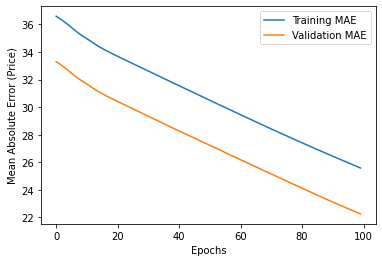

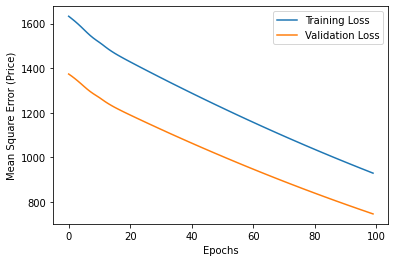

In [121]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# plotting loss on validation data
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)

In [122]:
# Making Predictions on Test Data
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [63]:
test_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 687.3094 - mse: 687.3094 - mae: 21.0960


In [123]:
print(f"Mean Squared Error: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[1]}")

Mean Squared Error: 687.3093872070312
Mean Absolute Error: 687.3093872070312


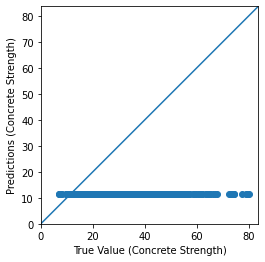

In [124]:
# Making Price Predictions On Test Data

plt.scatter(test_labels, predictions)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

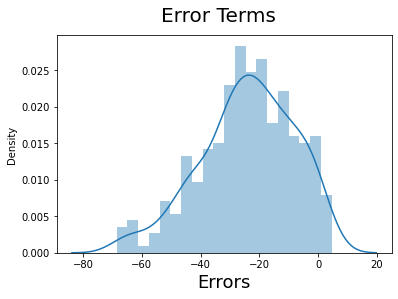

In [125]:
# Plotting Difference Between Actual Values And Predicted Values

fig = plt.figure()
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
# Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [68]:
#Making Second Model For Validation Data

In [126]:
model2 = M.Sequential()

model2.add(L.Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(L.Dense(64, activation = 'relu'))
model2.add(L.Dense(64, activation = 'relu'))
model2.add(L.Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [127]:
history2 = model2.fit(train_data, train_labels, epochs=500, verbose = 0, validation_split=0.2)


In [128]:

# Feeding histor2 In DataFrame
history_2_df = pd.DataFrame(history2.history)
history_2_df['epochs'] = history2.epoch
history_2_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
495,8.234868,8.234868,2.120884,40.565884,40.565884,4.493427,495
496,7.169428,7.169428,1.940035,32.943794,32.943794,3.936344,496
497,9.116363,9.116363,2.292061,33.442982,33.442982,4.026173,497
498,8.096601,8.096601,2.070722,32.599113,32.599113,3.855553,498
499,8.039448,8.039448,2.116215,35.076660,35.076660,4.248415,499


In [129]:
predictions2 = model2.predict(test_data)
predictions2 = predictions2.flatten()

In [130]:
predictions2.shape


(309,)

In [131]:
test2_score = model2.evaluate(test_data, test_labels)


10/10 [==============================] - 0s 2ms/step - loss: 31.6975 - mse: 31.6975 - mae: 4.1237


In [132]:
test2_score

[31.697492599487305, 31.697492599487305, 4.123690128326416]

In [133]:
print(f"Loss: {test2_score[0]}")
print(f"Mean Absolute Error: {test2_score[2]}")

Loss: 31.697492599487305
Mean Absolute Error: 4.123690128326416


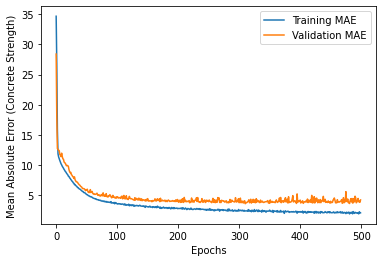

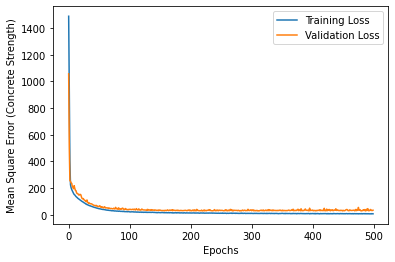

In [134]:
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['mae'], label = 'Training MAE')
  plt.plot(history_2_df['epochs'], history_2_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['loss'], label = 'Training Loss')
  plt.plot(history_2_df['epochs'], history_2_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_2_df)

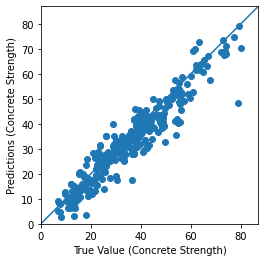

In [135]:
plt.scatter(test_labels, predictions2)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

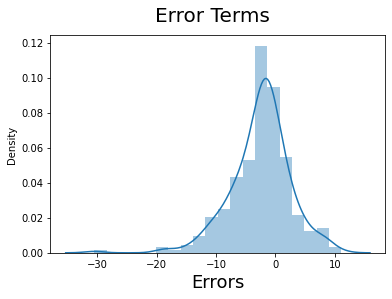

In [136]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions2 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
# Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [86]:
#Buliding Third Model For Overcoming Overfitting

In [137]:
# Overcoming Overfitting 
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

In [138]:
model3 = M.Sequential()
model3.add(L.Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model3.add(L.Dense(64, activation = 'relu'))
model3.add(L.Dense(64, activation = 'sigmoid'))
model3.add(L.Dense(1,))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [139]:
history_3 = model3.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split = 0.2)


In [140]:
history_3_df = pd.DataFrame(history_3.history)
history_3_df['epochs'] = history_3.epoch
history_3_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,33.413151,33.413151,4.285359,46.538609,46.538609,4.757832,95
96,34.222481,34.222481,4.333090,43.267365,43.267365,4.696282,96
97,31.723562,31.723562,4.167746,50.282021,50.282021,4.996156,97
98,33.196487,33.196487,4.292262,43.200130,43.200130,4.644384,98
99,31.323269,31.323269,4.141520,43.098656,43.098656,4.629325,99


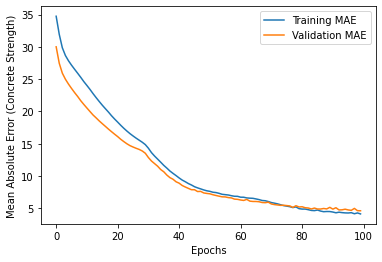

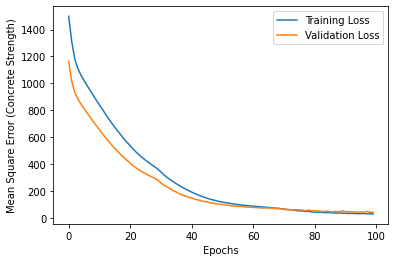

In [141]:
# Plotting Validation Loss After Overcoming Overfitting
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_3_df['epochs'], history_3_df['mae'], label = 'Training MAE')
  plt.plot(history_3_df['epochs'], history_3_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_3_df['epochs'], history_3_df['loss'], label = 'Training Loss')
  plt.plot(history_3_df['epochs'], history_3_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_3_df)

In [142]:
predictions3 = model3.predict(test_data)
predictions3 = predictions3.flatten()

In [143]:
test3_score  = model3.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 36.6241 - mse: 36.6241 - mae: 4.6103


In [144]:
print(f"Loss: {test3_score[0]}")
print(f"Mean Absolute Error: {test3_score[2]}")

Loss: 36.62411117553711
Mean Absolute Error: 4.610330104827881


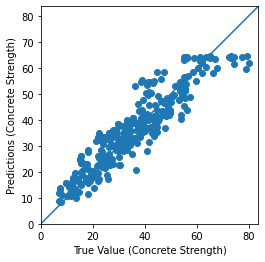

In [145]:
plt.scatter(test_labels, predictions3)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

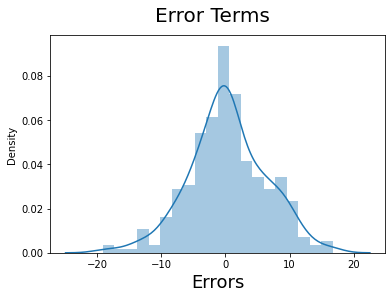

In [146]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions3 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)